Mitchell Scott (mtscot4)

Math 572 (SP 25)

Prof. A. Veneziani

Homework \# 1

## Exercise \# 1

Consider the following boundary value problem (Reaction-Diffusion):
$$
-\mu \frac{\text{d}^2u}{\text{d}x^2} + \sigma u = 0, \quad x\in(0,1), u(0) = 0, u(1) = 1, \quad \mu,\sigma>0.
$$

Answer the following questions:

### Verify that the exact solution reads $$u_{\text{ex}} = \frac{e^{\alpha x} - e^{-\alpha x}}{e^\alpha - e^{-\alpha}}, \quad \alpha = \sqrt{\frac{\sigma}{\mu}}$$
*Solution:* 
Since $u_{\text{ex}}$ is defined above, we simply take the second derivative of it to ensure equality.
$$u_{\text{ex}} = \frac{1}{e^\alpha - e^{-\alpha}}(e^{\alpha x} - e^{-\alpha x})\\
u'_{\text{ex}} = \frac{\alpha}{e^\alpha - e^{-\alpha}}(e^{\alpha x} - e^{-\alpha x})\\
u''_{\text{ex}} =\frac{\alpha^2}{e^\alpha - e^{-\alpha}}(e^{\alpha x} - e^{-\alpha x})$$

Now we plug this into the ODE to see:
$$ -\mu \frac{\text{d}^2u_{\text{ex}}}{\text{d}x^2} + \sigma u_{\text{ex}} = 0\\
-\mu  \frac{\alpha^2}{e^\alpha - e^{-\alpha}}(e^{\alpha x} - e^{-\alpha x}) + \sigma \frac{1}{e^\alpha - e^{-\alpha}}(e^{\alpha x} - e^{-\alpha x}) = 0\\
-\mu  \frac{\sigma}{\mu(e^\alpha - e^{-\alpha})}(e^{\alpha x} - e^{-\alpha x}) + \sigma \frac{1}{e^\alpha - e^{-\alpha}}(e^{\alpha x} - e^{-\alpha x}) = 0\\
- \frac{\sigma}{e^\alpha - e^{-\alpha}}(e^{\alpha x} - e^{-\alpha x}) + \sigma \frac{1}{e^\alpha - e^{-\alpha}}(e^{\alpha x} - e^{-\alpha x}) =0.
$$

Now it remains to be shown that $u_{\text{ex}}$ obeys the boundary conditions. Obvious it does since
$$ u_{\text{ex}}(0) = \frac{e^{\alpha 0} - e^{-\alpha 0}}{e^\alpha - e^{-\alpha}} = 0\\
u_{\text{ex}}(1) = \frac{e^{1\alpha } - e^{-1\alpha }}{e^\alpha - e^{-\alpha}} = 1.
$$

Since the $u_{\text{ex}}$ satisfies the ODE and the boundary condition, it must be a solution to the ODE.


### Consider the Finite Difference Scheme: $$ -\mu \frac{u_{i+1}-2u_i +u_{i-1}}{\Delta x^2} + \sigma u_i =0,$$ and prove that it is stable and second order accurate.

Stability means that the differential operator can be inverted. For this case, we have 
$$\mathcal{L} = \frac{\mu}{(\Delta x)^2}\begin{pmatrix} 2 & -1 & 0 & \cdots & 0 \\ -1 & 2 & -1 & \ddots & 0 \\ 0 & -1 & 2 & \ddots & 0\\ 0 & \ddots & \ddots & \ddots & 0\\ 0 & \cdots & 0 & -1 & 2 \end{pmatrix} + \sigma \begin{pmatrix} 1 & 0 & 0 & \cdots & 0 \\ 0 & 1 & 0 & \ddots & 0 \\ 0 & 0 & 1 & \ddots & 0\\ 0 & \ddots & \ddots & \ddots & 0\\ 0 & \cdots & 0 & 0 & 1 \end{pmatrix}\\
\mathcal{L}\begin{pmatrix} u_0\\u_1\\\vdots\\u_N\\u_{N+1}\end{pmatrix} = \begin{pmatrix} u_L\\0\\\vdots\\0\\u_R\end{pmatrix}$$

We proved in class that the first matrix is SND, and the second matrix is also SPD (as it is the identity). Since $-\mu < 0, and \sigma >0$, we have the sum of two SPD matrices, which makes it SPD. Furthermore, the eigenvalues for $\mathcal{L}$ can be explicitly written as:

$$
 \lambda_j = \sigma + \frac{4\mu}{(\Delta x)^2} \sin^2(\frac{j^2}{2N}), \quad \forall j = 1,2,\dots, N
$$

Since all of the eigenvalues $\lambda_j>0$, then this FD scheme is stable. 


### Verify your answer in a dedicated code.

In [154]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as sla


def uExactRD(mu, sigma, x):
    alpha = np.sqrt(sigma/mu)
    return ((np.exp(alpha*x) - np.exp(-alpha*x)) / (np.exp(alpha) - np.exp(-alpha)))

def thomas(a,b,c,d):
    n = len(d)
    a, b, c, d = map(np.array, (a, b, c, d))
    x = np.zeros(n)
    ## Numerical stability - divide by zero risk
    c[0] = c[0] / b[0]
    d[0] = d[0] / b[0]

    ## Forward substitution
    for i in range(1, n-1):
        c[i] = c[i] / (b[i] - a[i-1]*c[i-1])
        d[i] = (d[i] - a[i]*d[i-1]) / (b[i] - a[i]*c[i-1])
    
    d[n-1] = (d[n-1] - a[n-1]*d[n-2]) / (b[n-1] - a[n-1]*c[n-1])
        
    
    ## Backward substitution
    x[n-1] = d[n-1]
    for i in range(n-2, -1, -1):
        x[i] = d[i] - c[i]*x[i+1]
    return x

def boundaryConditions(x, leftBC, rightBC):
    x[0] = leftBC
    x[-1] = rightBC
    return x

def main(mu,sigma, h):
    ## Number of points
    N = int(1/h)
    
    ## Construct tridiagonal matrix (for Thomas)
    a = np.append(0,-mu/(h**2) * np.ones(N))
    b = (2*mu/(h**2) + sigma) * np.ones(N+1)
    c = np.append(-mu/(h**2) * np.ones(N),0)
    d = np.zeros(N+1)

    ## Enforce boundary conditions
    # we scale the boundary conditions by h^2 to match the discretization (numerical stability)
    a[-1] = 0
    b[0] = 1./(h**2)
    b[-1] = 1./(h**2)
    c[0] = 0

    d = boundaryConditions(d, 0, 1./(h**2))

    ## Solve system
    u = thomas(a,b,c,d)
    u = boundaryConditions(u, 0, 1)
    
    ## Plot and calculate error
    x = np.linspace(0,1,N+1)
    uEx = uExactRD(mu, sigma, x)

    plt.plot(x, u, label='Approximation')
    plt.plot(x, uEx, label='Exact')
    plt.xlabel('x')
    plt.ylabel('u(x)')
    plt.title('mu = ' + str(mu) + ', sigma = ' + str(sigma) + ', h = ' + str(h))
    plt.legend()
    plt.show()

    err = uEx-u
    err_inf = np.max(np.abs(err))
    err_2 = np.sqrt(err.T.dot(err))
    err_l2 = np.sqrt(h*err.T.dot(err))

    print(f"L^\u221E error:\t{err_inf}")
    print(f"L error:\t{err_2}")
    print(f"L^2 error:\t{err_l2}")
    plt.plot(err)
    plt.show()

    return err_inf, err_l2

h = 0.1


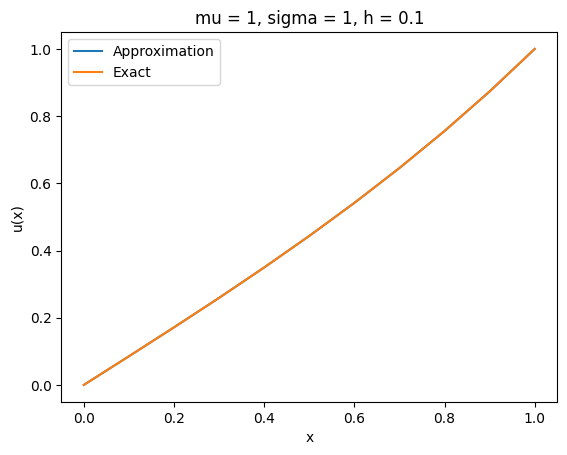

L^∞ error:	4.4145914650961515e-05
L error:	0.0001001058577180938
L^2 error:	3.165625175139224e-05


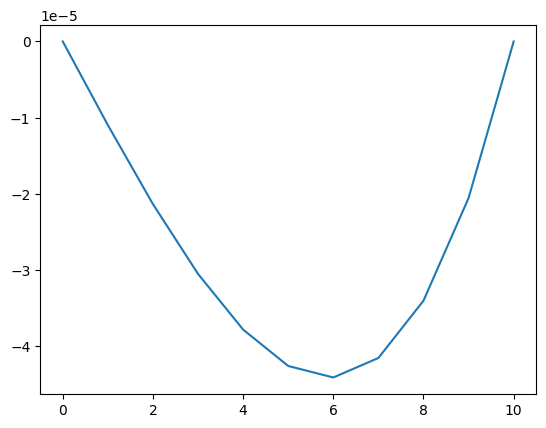

h = 0.05


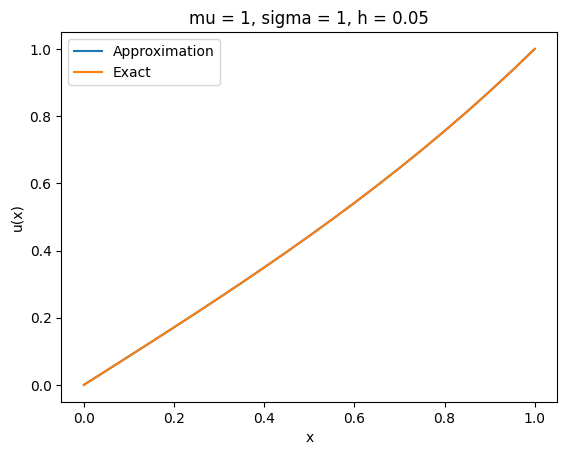

L^∞ error:	1.1046891147725724e-05
L error:	3.5428936468785744e-05
L^2 error:	7.922151031472628e-06


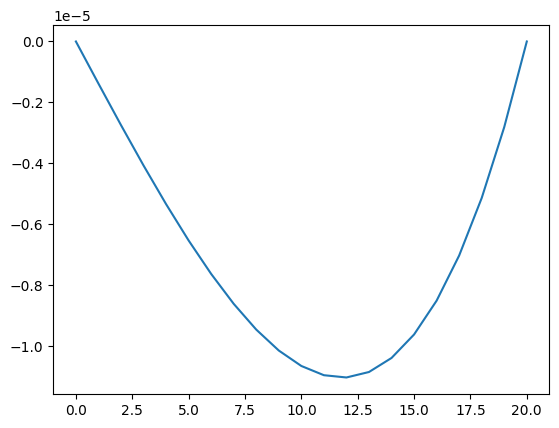

h = 0.025


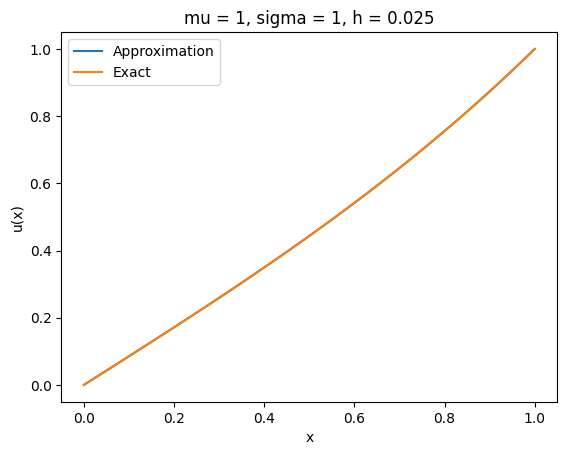

L^∞ error:	2.76237451046768e-06
L error:	1.2529036779999298e-05
L^2 error:	1.9810146556409876e-06


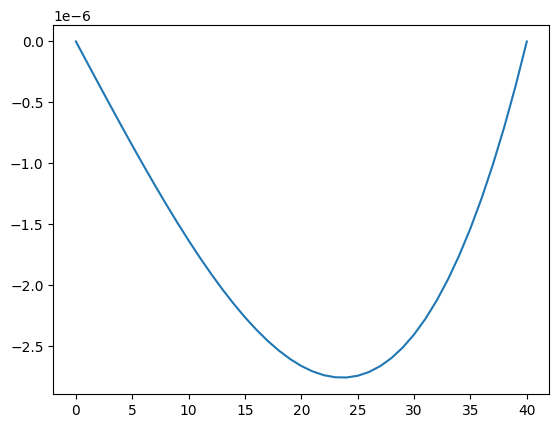

h = 0.0125


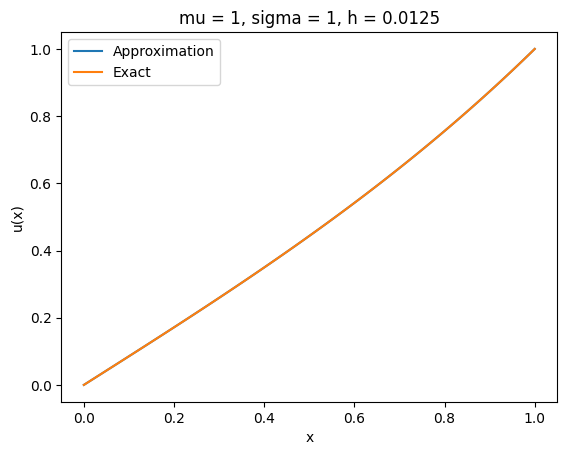

L^∞ error:	6.908963083862574e-07
L error:	4.429945994695048e-06
L^2 error:	4.952830190395524e-07


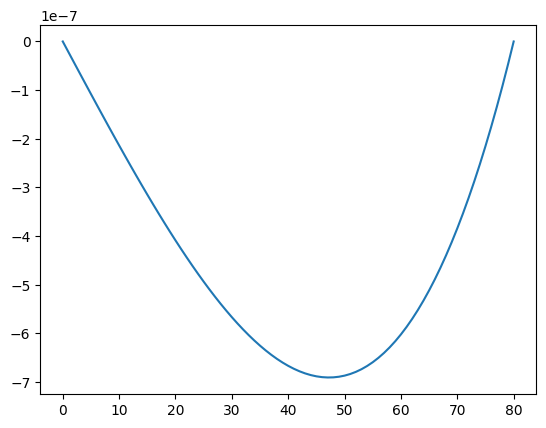

h = 0.00625


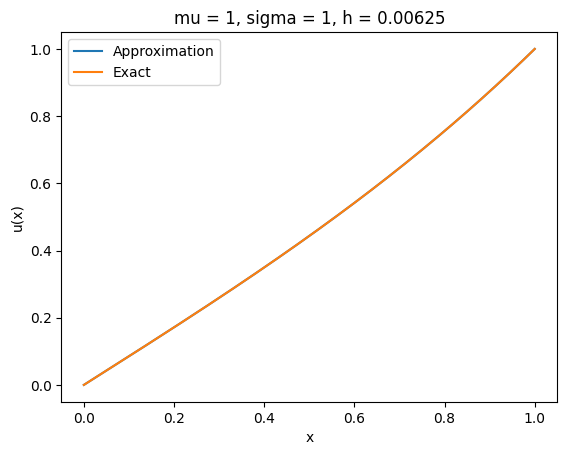

L^∞ error:	1.727266242257386e-07
L error:	1.5662455461718388e-06
L^2 error:	1.238225825249357e-07


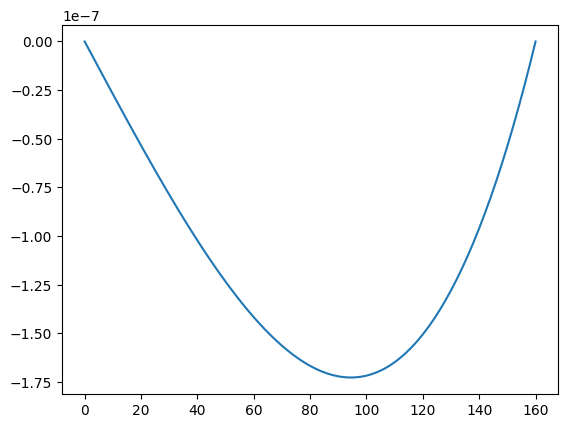

h = 0.003125


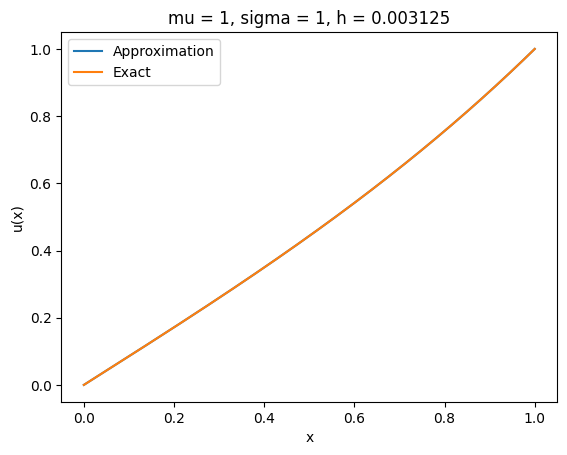

L^∞ error:	4.318346713549914e-08
L error:	5.53753502365021e-07
L^2 error:	3.0955761851669436e-08


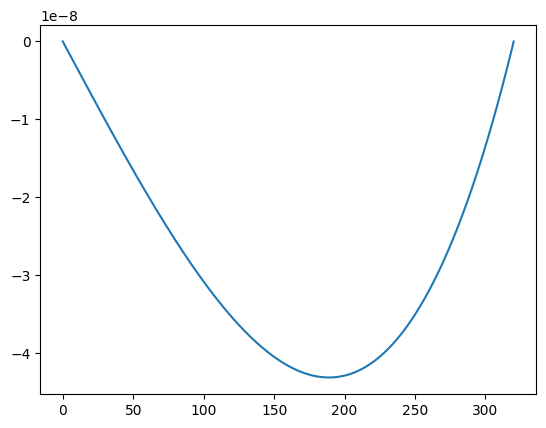

In [155]:
h = np.array([0.1, 0.05, 0.025, 0.0125, 0.00625, 0.003125])
allerrinf = np.zeros(6)
allerrL2 = np.zeros(6)
i = 0

for step in h:
    print(f"h = {step}")
    mu = 1
    sigma = 1
    allerrinf[i], allerrL2[i] = main(mu, sigma, step)
    i+=1

In [138]:
print("L^\u221E error ratio:")
for i in range(allerrinf.shape[0]-1):
    print(allerrinf[i]/allerrinf[i+1])

print("\nL^2 error ratio:")
for i in range(allerrL2.shape[0]-1):
    print(allerrL2[i]/allerrL2[i+1])

L^∞ error ratio:
3.9962297139182046
3.9990562850420472
3.998247605230114
3.9999410136292384
3.9998322432926643

L^2 error ratio:
3.9959162133655686
3.9990370636149057
3.999762922384358
3.99994095535692
3.9999849823840785


This last code cell proves that it is $2^{\text{nd}}$ order accurate. As we learned in class to see order of a numerical method, we must look at how the $L^\infty, L^2$ error scales. For these to be second order, if we decrease $h$ by a factor of 2, the error should decrease by a factor of 4. We see this for both error types. The step sizes $h = [0.1, 0.05, 0.025,\cdots]$, decrease by a factor of 2, and the error at the $i^{\text{th}}$ step is 3.99999 times larger than the $(i+1)^{\text{th}}$ step. This is consistent over many values of $i$.

## Exercise 2

Consider the Advection - Diffusion problem:
$$
-\mu \frac{\text{d}^2u}{\text{d}x^2} + \beta \frac{\text{d}u}{\text{d}x} = 0, \quad x\in(0,1), u(0) = 0, u(1) = 1, \quad \mu > 0.
$$

Answer the following questions:

### Specify under what condition on $\Delta x$ the centered second order finite difference discretization $$-\mu \frac{u_{i+1}-2u_i +u_{i-1}}{\Delta x^2} + \beta \frac{u_{i+1} - u_{i-1}}{2\Delta x} =0 $$ does not produce oscillations. Sketch a proof of the condition you find.

### Produce a **second order upwind method** (different from Sharfetter Gummel) depending on the sign of $\beta$.

First let $\beta>0$. To be an upwind scheme, this means that we can only look at points that are downstream to inform the future. For example, since we want to solve for $u_i = u_0 + ih$ (where $h := \Delta x$), the second order upwind scheme would use $u_{i-1}, u_{i-2}$. Taylor expanding these points, we get
$$
u_{i-1} = u_i - u_i'h + u''_i\frac{h^2}{2} + \mathcal{O}(h^3)\\
u_{i-2} = u_i - 2u_i'h + u''_i\frac{(2h)^2}{2} + \mathcal{O}(h^3)\\
$$

Using the method of undetermined coefficients, we aim to select $\alpha, \gamma$, such that $\alpha u_{i-1} + \gamma u_{i-2}$ let $u_i'$ have coefficient 1 and the $u''_i$ terms cancel. Namely this requires,

$$ -\alpha - 2\gamma = 1, \quad -\frac{\alpha}{2} - 2\gamma = 0.$$

Solving for these variables, we see $\alpha = -2, \gamma = \frac{1}{2}$. We then compute

$$ 
\alpha u_{i-1} + \gamma u_{i-2} = -2u_{i-1} + \frac{1}{2}u_{i-2}\\
= -2u_i + 2u_i'h + u''_ih^2 + \mathcal{O}(h^3) + \frac{1}{2}u_i - u_i'h + u''_i\frac{(2h)^2}{4} + \mathcal{O}(h^3)\\
= \frac{1}{2}u_{i-2} - 2u_{i-1} + \frac{3}{2}u_i\\
= u'_ih + \mathcal{O}(h^3).
$$

Rearranging, we arrive at
$$\frac{u_{i-2} - 4u_{i-1} + 3u_i}{2h} = u'_i + \mathcal{O}(h^2),$$

which is a second order accurate upwind scheme. 

Now let $\beta<0$. For this to be an upwind scheme, we would need to use $u_i, u_{i+1}, u_{i+2}$. Using the exact same process above of Taylor expanding, using the Method of undetermined coefficients, and adding these terms, it should be no suprise that we have
$$
\frac{-3u_i + 4u_{i+1} - u_{i+2}}{2h} = u_i' + \mathcal{O}(h^2),
$$
a second order upwind scheme, which is the exact opposite of what we discovered before.


### Implement your idea and verify your expectations for $|\beta| \gg \mu$.

In [ ]:
def uExactAD(mu,beta,x):
    return (np.exp(beta*x/mu)-1)/(np.exp(beta/mu)-1)

def main(mu, beta, h):
    ## Number of points
    N = int(1/h)
    
    ## Construct Upwind matrix 
    if beta >= 0:
        a = np.append(0,-mu/(h**2) * np.ones(N))
        b = (2*mu/(h**2)) * np.ones(N+1)
        c = np.append(-mu/(h**2) * np.ones(N),0)
    else:
        a = np.append(0,-mu/(h**2) * np.ones(N))
        b = (2*mu/(h**2)) * np.ones(N+1)
        c = np.append(-mu/(h**2) * np.ones(N),0)
        d = np.zeros(N+1)

    ## Enforce boundary conditions
    a[-1] = 0
    b[0] = 1./(h**2)
    b[-1] = 1./(h**2)
    c[0] = 0

    d = boundaryConditions(d, 0, 1./(h**2))

    ## Solve system
    u = sla.solve_banded((1,1), np.array([a,b,c]), d)
    u = boundaryConditions(u, 0, 1)
    
    ## Plot and calculate error
    x = np.linspace(0,1,N+1)
    uEx = uExactAD(mu, beta, x)

    plt.plot(x, u, label='Approximation')
    plt.plot(x, uEx, label='Exact')
    plt.xlabel('x')
    plt.ylabel('u(x)')
    plt.title('mu = ' + str(mu) + ', sigma = ' + str(sigma) + ', h = ' + str(h))
    plt.legend()
    plt.show()

    err = uEx-u
    err_inf = np.max(np.abs(err))
    err_2 = np.sqrt(err.T.dot(err))
    err_l2 = np.sqrt(h*err.T.dot(err))

    print(f"L^\u221E error:\t{err_inf}")
    print(f"L error:\t{err_2}")
    print(f"L^2 error:\t{err_l2}")
    plt.plot(err)
    plt.show()

    return err_inf, err_l2